In [18]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
plt.rcParams["figure.figsize"] = (6,4)
plt.rcParams['figure.dpi'] = 96
sns.set_style("darkgrid")
import glob
import math
import os
import random

In [19]:
# Loading images
imgs = []
for index in range(1985,2021,5):
    imgs.append(cv2.imread("./inputs/P3/siling_lake_{0}.jpg".format(index)))

In [20]:
water_areas = []
for index in range(len(imgs)):
    img = imgs[index].copy()
    _, img[:,:,1] = cv2.threshold(img[:,:,1],85,255,cv2.THRESH_BINARY)
    _, img[:,:,0] = cv2.threshold(img[:,:,0],90,255,cv2.THRESH_BINARY)
    _, img[:,:,2] = cv2.threshold(img[:,:,2],100,255,cv2.THRESH_BINARY)
    c_img = img.copy()
    water_areas.append(c_img)
    
    img[np.where((img == [255,0,0]).all(axis = 2))] = [0,0,0]
    img[np.where((img == [255,255,0]).all(axis = 2))] = [0,0,0]
    
 
    for i in [255,0]:
        for j in [255,0]:
            for k in [255,0,0]:
                if [i,j,k] != [0,0,0]:
                    img[np.where((img == [i,j,k]).all(axis = 2))] = [255,255,255]

    water_areas.append(img)


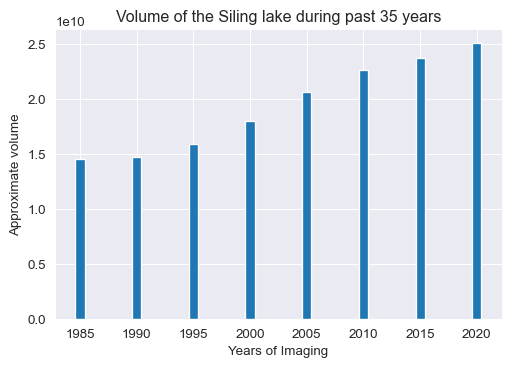

In [23]:
area_unit_in_meter = (10000/251)**2
depth = 6.4
years = list(range(1985,2021,5))
vols = []

for index in range(1,len(water_areas),2):
    inverted = cv2.bitwise_not(water_areas[index])
    water_pixels =  inverted[:,:,0].flatten().sum()//255
    water_vol = area_unit_in_meter*depth*water_pixels
    depth += 0.3 
    vols.append(water_vol)
    
plt.bar(years,vols)
plt.xlabel("Years of Imaging")
plt.ylabel("Approximate volume")
plt.title("Volume of the Siling lake during past 35 years")
plt.show()

In [22]:
compare_images = []
i = 0
for index in range(0,len(water_areas)-1,+2):
    compare_images.append(cv2.hconcat([imgs[i],water_areas[index],water_areas[index+1]]))
    i += 1 
cv2.imwrite("./outputs/P03-e/report 1985-2000.jpg",cv2.vconcat(compare_images[:4]))
cv2.imwrite("./outputs/P03-e/report 2000-2020.jpg",cv2.vconcat(compare_images[4:]))

True